In [1]:
import toml
from cabm_agent import ConsumerModel
from cabm_function_library.joint_calendar import generate_joint_ad_promo_schedule
from cabm_function_library.ad_helpers import generate_brand_ad_channel_map

In [2]:
import warnings
warnings.filterwarnings("error")

In [3]:
config = toml.load("config.toml")

In [4]:
model = ConsumerModel(1000, enable_ads=True)

In [5]:
for i in range(110):
    model.step()

Agent: 952; Adstock: {'A': 742.3168143884798, 'B': 513.9126290240034}
Agent: 605; Adstock: {'A': 899.7382100189327, 'B': 622.8968817378799}
Agent: 875; Adstock: {'A': 641.1089627310948, 'B': 443.8455200552196}
Agent: 996; Adstock: {'A': 832.014257093184, 'B': 576.0109780087006}
Agent: 874; Adstock: {'A': 655.611808621882, 'B': 453.88597113432434}
Agent: 461; Adstock: {'A': 828.748577938871, 'B': 573.7501188617547}
Agent: 592; Adstock: {'A': 850.7927125967041, 'B': 589.0114722043955}
Agent: 900; Adstock: {'A': 986.4056257155794, 'B': 682.8975156829314}
Agent: 744; Adstock: {'A': 384.4678010750463, 'B': 266.1705279952782}
Agent: 350; Adstock: {'A': 746.7120263365169, 'B': 516.9554739165769}
Agent: 770; Adstock: {'A': 746.3714167987546, 'B': 516.7196668600357}
Agent: 304; Adstock: {'A': 867.742568952079, 'B': 600.7460107091522}
Agent: 378; Adstock: {'A': 655.7357897772428, 'B': 453.97180440694575}
Agent: 303; Adstock: {'A': 561.2196648634052, 'B': 388.5374382466618}
Agent: 771; Adstock: {

In [5]:
model_df = model.datacollector.get_model_vars_dataframe()

In [6]:
model_df

Total_Purchases  Average_Product_Price  Week_Number
0        {'A': 0, 'B': 0}                   5.00            1
1    {'A': 230, 'B': 205}                   2.50            2
2    {'A': 477, 'B': 418}                   2.50            3
3    {'A': 456, 'B': 464}                   2.50            4
4    {'A': 441, 'B': 520}                   3.75            5
..                    ...                    ...          ...
105  {'A': 464, 'B': 450}                   2.50            2
106  {'A': 438, 'B': 481}                   2.50            3
107  {'A': 459, 'B': 477}                   2.50            4
108  {'A': 489, 'B': 433}                   3.75            5
109  {'A': 446, 'B': 471}                   3.75            6

[110 rows x 3 columns]

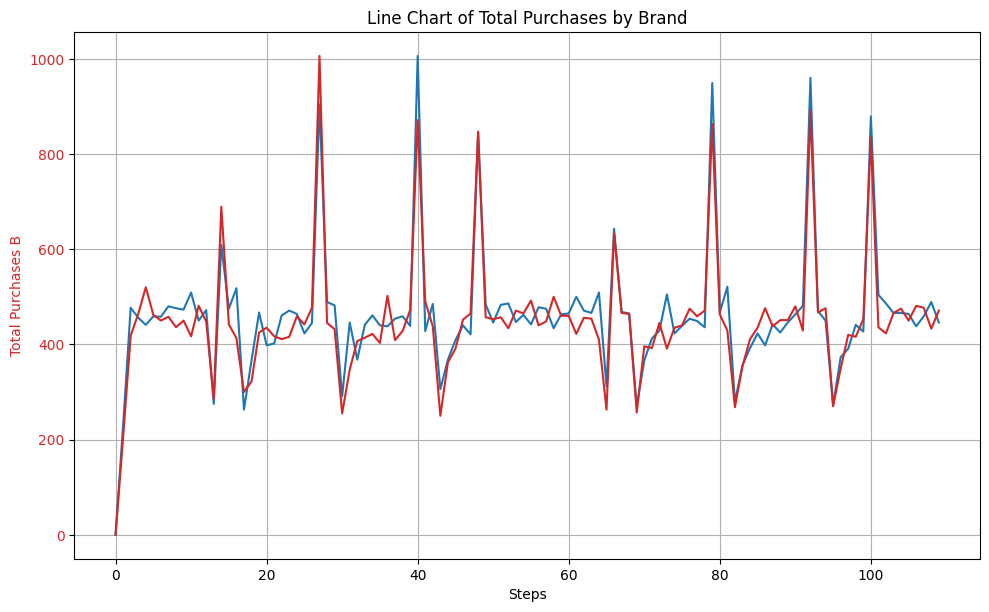

In [7]:
import matplotlib.pyplot as plt

# Extract purchases by brand
model_df['Total_Purchases_A'] = model_df['Total_Purchases'].apply(lambda x: x['A'])
model_df['Total_Purchases_B'] = model_df['Total_Purchases'].apply(lambda x: x['B'])

fig, ax1 = plt.subplots(figsize=(10,6))

# Plot total purchases for brand A
color = 'tab:blue'
ax1.set_xlabel('Steps')
ax1.set_ylabel('Total Purchases A', color=color)
ax1.plot(model_df['Total_Purchases_A'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plot total purchases for brand B on the same axis
color = 'tab:red'
ax1.set_ylabel('Total Purchases B', color=color)
ax1.plot(model_df['Total_Purchases_B'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Line Chart of Total Purchases by Brand')
plt.grid(True)
plt.show()

In [8]:
agent_summary_df = model.datacollector.get_agent_vars_dataframe()

In [13]:
agent_summary_df.columns

Index(['Household_Size', 'Purchased_This_Step', 'Pantry_Stock', 'Pantry_Max',
       'Pantry_Min', 'Purchase_Behavior', 'Minimum_Purchase_Needed',
       'Current_Product_Price', 'Last_Product_Price', 'Brand_Preference'],
      dtype='object')

In [10]:
import matplotlib.pyplot as plt

def plot_purchases(agent_summary_df, AgentID):
    # Filter dataframe for the given AgentID
    agent_df = agent_summary_df.xs(AgentID, level='AgentID')

    # Extract purchases by brand
    agent_df['Purchased_This_Step_A'] = agent_df['Purchased_This_Step'].apply(lambda x: x['A'])
    agent_df['Purchased_This_Step_B'] = agent_df['Purchased_This_Step'].apply(lambda x: x['B'])

    fig, ax1 = plt.subplots(figsize=(10,6))

    ax1.set_xlabel('Steps')
    ax1.set_ylabel('Purchases')

    # Plot purchases for brand A
    color = 'tab:blue'
    
    ax1.plot(agent_df['Purchased_This_Step_A'], color=color)
    #ax1.tick_params(axis='y', labelcolor=color)

    #ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    # Plot purchases for brand B
    color = 'tab:red'
    #ax1.set_ylabel('Purchases B', color=color)
    ax1.plot(agent_df['Purchased_This_Step_B'], color=color)
    ax1.set_label('blerk')
    #ax1.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f'Line Chart of Purchases by Agent {AgentID}')
    plt.grid(True)
    plt.show()

In [11]:
dir(ax1)

['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_fully_clipped_to_axes',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spine

/var/folders/_4/pklh2cf12qv15sy02prk9_6m0000gq/T/ipykernel_88814/2666772297.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_df['Purchased_This_Step_A'] = agent_df['Purchased_This_Step'].apply(lambda x: x['A'])
/var/folders/_4/pklh2cf12qv15sy02prk9_6m0000gq/T/ipykernel_88814/2666772297.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_df['Purchased_This_Step_B'] = agent_df['Purchased_This_Step'].apply(lambda x: x['B'])


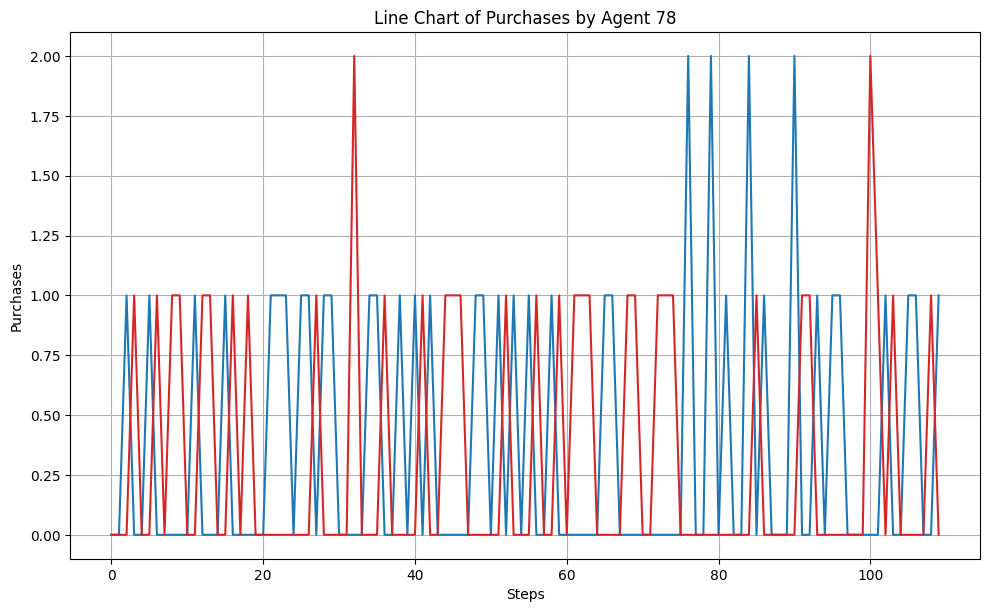

In [12]:
plot_purchases(agent_summary_df,78)

In [13]:
def check_multiple_purchases(df):
    # Define a function to check if more than one value in the dictionary is greater than 0
    def more_than_one_purchase(purchases):
        return sum(value > 0 for value in purchases.values()) > 1

    # Apply the function to the 'Purchased_This_Step' column
    multiple_purchases = df['Purchased_This_Step'].apply(more_than_one_purchase)

    # Return True if there are any cases of multiple purchases, False otherwise
    return any(multiple_purchases)

# Usage:
print(check_multiple_purchases(agent_summary_df))

False


In [14]:
def count_letter_changes(series):
    # Compute the difference between consecutive letters
    letter_changes = series != series.shift()

    # Ignore the first value
    letter_changes = letter_changes.iloc[1:]

    # Sum the letter_changes series to get the number of letter changes
    change_count = letter_changes.sum()

    return change_count

In [15]:
count_letter_changes(agent_summary_df.xs(5, level='AgentID')['Brand_Preference'])

0

In [16]:
agent_summary_df.index

MultiIndex([(  0,   0),
            (  0,   1),
            (  0,   2),
            (  0,   3),
            (  0,   4),
            (  0,   5),
            (  0,   6),
            (  0,   7),
            (  0,   8),
            (  0,   9),
            ...
            (109, 990),
            (109, 991),
            (109, 992),
            (109, 993),
            (109, 994),
            (109, 995),
            (109, 996),
            (109, 997),
            (109, 998),
            (109, 999)],
           names=['Step', 'AgentID'], length=110000)

In [17]:
agent_summary_df.xs(8, level='AgentID')['Brand_Preference'].values

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A'], dtype=object)

In [18]:
# Get all unique AgentIDs
unique_agent_ids = agent_summary_df.index.get_level_values('AgentID').unique()

# Loop over all AgentIDs and apply function
results = []
for agent_id in unique_agent_ids:
    agent_brand_pref = agent_summary_df.xs(agent_id, level='AgentID')['Brand_Preference']
    result = count_letter_changes(agent_brand_pref)
    results.append((agent_id, result))
    

In [19]:
for i in unique_agent_ids:
    print(agent_summary_df.xs(agent_id, level='AgentID')['Brand_Preference'].values)

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A']
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A']
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A